In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Alex\AppData\Local\Temp\ipykernel_10892\1020607637.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [13]:
# загрузка данных

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [4]:
# **Характеристики набора данных:**

# :Количество экземпляров: 569

# :Количество атрибутов: 30 числовых, прогнозируемых атрибутов и класса.

# :Информация об атрибутах:
#      - радиус (среднее значение расстояний от центра до точек периметра)
#      - текстура (стандартное отклонение значений шкалы серого)
#      - периметр
#      - область
#      - гладкость (локальное изменение длины радиусов)
#      - компактность (периметр^2/площадь - 1,0)
#      - вогнутость (выраженность вогнутых участков контура)
#      - вогнутые точки (количество вогнутых участков контура)
#      - симметрия
#      - фрактальная размерность («приближение береговой линии» - 1)

#      Среднее значение, стандартная ошибка и «худшее» или наибольшее (среднее из трех
#      худшие/самые большие значения) этих функций были рассчитаны для каждого изображения

In [5]:
cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
# добавим целевую переменную
cancer_df['target'] = cancer.target

In [6]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
# расшифруем 0 и 1 в значениях целевой переменной
# для этого посчитаем сколько раз встречается 0 и сколько раз встречается 1

In [8]:
unique, counts = np.unique(cancer.target,return_counts=True)
unique, counts

(array([0, 1]), array([212, 357], dtype=int64))

In [9]:
#  ноль означает злокачественное образование, а единица — доброкачественное.

In [10]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
cancer_df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.13,3.52,6.98,11.70,13.37,15.78,28.11
mean texture,569.0,19.29,4.30,9.71,16.17,18.84,21.80,39.28
mean perimeter,569.0,91.97,24.30,43.79,75.17,86.24,104.10,188.50
mean area,569.0,654.89,351.91,143.50,420.30,551.10,782.70,2501.00
mean smoothness,569.0,0.10,0.01,0.05,0.09,0.10,0.11,0.16
mean compactness,569.0,0.10,0.05,0.02,0.06,0.09,0.13,0.35
mean concavity,569.0,0.09,0.08,0.00,0.03,0.06,0.13,0.43
mean concave points,569.0,0.05,0.04,0.00,0.02,0.03,0.07,0.20
mean symmetry,569.0,0.18,0.03,0.11,0.16,0.18,0.20,0.30
mean fractal dimension,569.0,0.06,0.01,0.05,0.06,0.06,0.07,0.10


In [12]:
# предварительная обработка данных

In [15]:
# проверим наличие пропущенных значений
cancer_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [17]:
# преобразование категориальных переменных
# Выполнять не требуется / по причине того, что все нецелевые параметры числовые, а целевая категориальная (0/1)

In [18]:
# выполним нормализацию данных

In [21]:
# снова создадим датафрейм без целевой переменной
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cancer_df)

In [24]:
# преобразуем scaled_data в DataFrame
cancer_df_scaled = pd.DataFrame(scaled_data, columns=cancer.feature_names)
# добавим целеую переменную
cancer_df_scaled['target'] = cancer.target
# просмотрим результат изменений
cancer_df_scaled.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0


In [25]:
cancer_df_scaled.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,-0.00,1.00,-2.03,-0.69,-0.22,0.47,3.97
mean texture,569.0,-0.00,1.00,-2.23,-0.73,-0.10,0.58,4.65
mean perimeter,569.0,-0.00,1.00,-1.98,-0.69,-0.24,0.50,3.98
mean area,569.0,-0.00,1.00,-1.45,-0.67,-0.30,0.36,5.25
mean smoothness,569.0,0.00,1.00,-3.11,-0.71,-0.03,0.64,4.77
mean compactness,569.0,-0.00,1.00,-1.61,-0.75,-0.22,0.49,4.57
mean concavity,569.0,-0.00,1.00,-1.11,-0.74,-0.34,0.53,4.24
mean concave points,569.0,0.00,1.00,-1.26,-0.74,-0.40,0.65,3.93
mean symmetry,569.0,-0.00,1.00,-2.74,-0.70,-0.07,0.53,4.48
mean fractal dimension,569.0,-0.00,1.00,-1.82,-0.72,-0.18,0.47,4.91


In [26]:
# исследовательский анализ данных

In [28]:
# сгруппируем данные по целевой переменной, рассчитаем среднее и перевернем (транспонируем) наш датафрейм
# все это последовательно делается с помощью group_by, mean() и .T

In [31]:
data = cancer_df_scaled.groupby('target').mean().T
data.shape

(30, 2)

In [32]:
# Как мы видим, теперь в строках содаржатся наши признаки и соответствующие им средние значения, разбитые на две группы (среднее значение для злокачественной опухоли и среднее для доброкачественной). 
# Теперь давайте посчитаем разницу и вычислим модуль. 
# Так мы сможем сравнивать получившиеся значения между собой.

In [33]:
# вычтем одну колонку из другой и вычислим модуль
# синтаксис может показаться сложным, пока не обращайте на это внимания

In [34]:
data['diff'] = abs(data.iloc[:,0]-data.iloc[:,1])

In [35]:
# остается отсортировать наш датафрейм по столбцу разницы средних в нисходящем порядке

In [36]:
data = data.sort_values(by=['diff'],ascending=False)
data.head(10)

target,0,1,diff
worst concave points,1.029791,-0.611529,1.641320
worst perimeter,1.015969,-0.603320,1.619289
mean concave points,1.007793,-0.598465,1.606258
worst radius,1.007585,-0.598342,1.605927
mean perimeter,0.963700,-0.572281,1.535981
worst area,0.952267,-0.565492,1.517759
mean radius,0.947340,-0.562566,1.509906
mean area,0.920031,-0.546349,1.466380
mean concavity,0.903649,-0.536621,1.440270
worst concavity,0.855960,-0.508301,1.364261


Text(0.5, 1.0, 'Распределение worst concave points для двух типов опухолей')

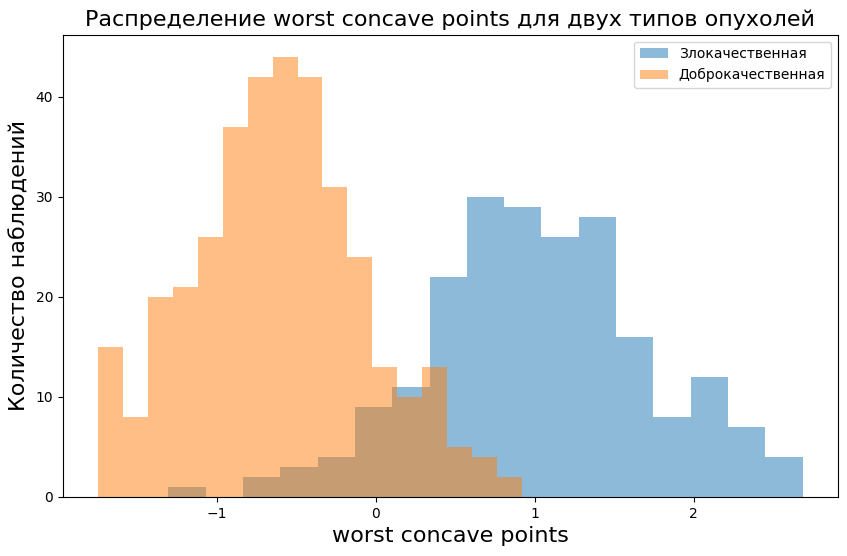

In [37]:
# задаем количество интервалов
bins = 17
 
# и размер графика
plt.figure(figsize = (10,6))
 
# из датафрейма cancer_df_scaled выберем столбец 'worst concave points'
# и только те строки, где target == 0 (злокачественная)
plt.hist(cancer_df_scaled.loc[cancer_df_scaled['target'] == 0, 'worst concave points'], bins, alpha = 0.5, label = 'Злокачественная')
 
# то же самое, но target == 1 (доброкачественная)
plt.hist(cancer_df_scaled.loc[cancer_df_scaled['target'] == 1, 'worst concave points'], bins, alpha = 0.5, label = 'Доброкачественная')
plt.legend(loc = 'upper right')
 
# добавим подписи и размер шрифта
plt.xlabel('worst concave points', fontsize = 16)
plt.ylabel('Количество наблюдений', fontsize = 16)
plt.title('Распределение worst concave points для двух типов опухолей', fontsize = 16)

In [38]:
# отбор и выделение признаков

In [39]:
# На основе проведенного EDA, давайте возьмем десять признаков в наибольшими отличиями среднего арифметического в зависимости от значения целевой переменной. 
# Таким образом, в нашу модель войдут: worst concave points, worst perimeter, mean concave points, worst radius, mean perimeter, worst area, mean radius, mean area, mean concavity, worst concavity.
# Давайте поместим наши признаки в переменную X, а классы в переменную y. 
# Для этого возьмем названия признаков из индекса нашего вспомогательного датафрейма data, преобразуем их в список и сделаем срез по первым 10 значениям (и все это для того, чтобы не набирать названия столбцов вручную).

In [40]:
features = list(data.index[:10])
print(features)

['worst concave points', 'worst perimeter', 'mean concave points', 'worst radius', 'mean perimeter', 'worst area', 'mean radius', 'mean area', 'mean concavity', 'worst concavity']


In [41]:
X = cancer_df_scaled[features]

In [42]:
y = cancer_df_scaled['target']

In [43]:
# oбучение и оценка качества модели

In [44]:
# pазделение на обучающую и тестовую выборки

In [45]:
from sklearn.model_selection import train_test_split

# размер тестовой выборки составит 30%
# также зададим точку отсчета для воспроизводимости результата
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [46]:
# обучение модели и прогноз

In [47]:
from sklearn.linear_model import LogisticRegression

# создадим объект этого класса и запишем его в переменную model
model = LogisticRegression()

# обучим нашу модель
model.fit(X_train, y_train)

# выполним предсказание класса на тестовой выборке
y_pred = model.predict(X_test)

In [48]:
#Вначале построим матрицу ошибок (confusion matrix). 
# Она в целом покажет, сколько наблюдений были правильно и неправильно классифицированы как злокачественные, и сколько — как доброкачественные. 
# Схематично это выглядит так:

In [51]:
from sklearn.metrics import confusion_matrix
# передадим ей тестовые и прогнозные значения
# поменяем порядок так, чтобы злокачественные опухоли были положительным классом
model_matrix = confusion_matrix(y_test, y_pred,labels=[1,0])

# для удобства создадим DF
model_matrix_df = pd.DataFrame(model_matrix)
model_matrix_df

,0,1
0,104,4
1,2,61


In [52]:
# добавим подписи к столбцам и строкам через параметры columns и index
# столбец - это прогноз, строка - фактическое значение
# 0 - добр. образование, 1 - злок. образование (только в рамках матрицы ошибок!)
model_matrix_df = pd.DataFrame(model_matrix, columns = ['Прогноз добр.', 'Прогноз злок.'], index = ['Факт добр.', 'Факт злок.'])
model_matrix_df

,Прогноз добр.,Прогноз злок.
Факт добр.,104,4
Факт злок.,2,61


In [53]:
# рассчитаем accuracy или долю правильных прогнозов
round((61+104)/(61+104+2+4),2)

0.96

In [54]:
from sklearn.metrics import accuracy_score

model_accurancy = accuracy_score(y_test, y_pred)
round(model_accurancy,2)

0.96